In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [40]:
# import nSimplices 
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_final.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

Section 2.1.1: Cross dataset

In [3]:
### Prepare the dataset
df_cross = []
for x in range(-6,7,1):
    df_cross.append([x, 0, 0])
for y in range(-6,7,1):
    df_cross.append([0, y, 0])
df_cross = pd.DataFrame(df_cross)
N = df_cross.shape[0]

ori_dis=pdist(df_cross.copy()) # compute pairwise distance in data
ori_dis_sq=squareform(ori_dis) # true pairwise distance in squared form


In [4]:
# Add outliers 
num_outliers = 3
outlier_indices=np.sort(alea.sample(range(N),num_outliers))

for idx in outlier_indices:
    horsplan=alea.uniform(-100,100)
    df_cross.loc[idx,2] = horsplan

In [5]:
### Preparing pairwise distances

""" euclidean distances """
out_dis=pdist(df_cross)
out_dis_sq=squareform(out_dis)

In [6]:

### Run nSimplices method
d=20
T1=time.time()
dico_outlier,rdim,coor_dis_sq,coor_coord = nSimplices(out_dis_sq,d,n0=1,nf=13)
T2=time.time()
print("running time is:", T2-T1)

running time is: 3.8666770458221436


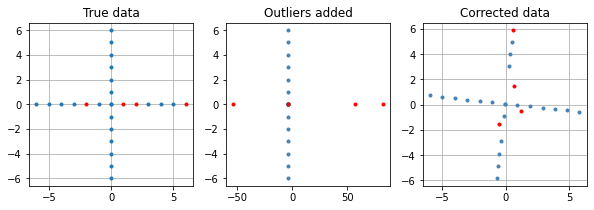

In [7]:
### Plot in 2D using the two largest eigenvalues - Fig.2

outlier_list=dico_outlier # list of outliers
normal_list=[i for i in range(N) if i not in outlier_list] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(ori_dis_sq)
ax1.plot(Xe[normal_list,0],Xe[normal_list,1],'.')
ax1.plot(Xe[outlier_list,0],Xe[outlier_list,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax2.plot(Xe[normal_list,0],Xe[normal_list,1],'.', color='steelblue')
ax2.plot(Xe[outlier_list,0],Xe[outlier_list,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(coor_dis_sq)   
ax3.plot(Xe[normal_list,0],Xe[normal_list,1],'.', color='steelblue')
ax3.plot(Xe[outlier_list,0],Xe[outlier_list,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.2: Main subspace of dimension 2

In [8]:
### test data, read in a dataset of main dimension 2
df_dim2 = pd.read_csv(r'datasets/bdd_synthetic_rdim2.csv',sep=';',header=None)
df_dim2.head()

,0,1,2,3,4,5,6
0,3.293901,12.210740,-0.000137,2.944050,9.936725,0.034665,2.004415
1,3.996557,24.732818,-0.000090,2.943247,9.991756,-0.006568,1.856705
2,1.472966,8.120509,0.000087,3.126671,10.256404,0.023691,2.019574
3,1.609483,15.557600,-0.000039,2.918684,10.123666,-0.022962,2.067711
4,-0.051618,14.014929,-0.000090,3.065950,10.110528,0.032691,1.992638


In [9]:
### Processing datasets and computing pairwise distances
N=df_dim2.shape[0]
ori_dis=pdist(df_dim2.copy()) # compute pairwise distance in data
ori_dis_sq=squareform(ori_dis) # true pairwise distance in squared form

In [10]:
### Add outliers
prop=0.10
num_outliers = int(np.ceil(prop*N))

# random draw of outliers 
indices=np.sort(alea.sample(range(N),num_outliers))
for n in indices:
    horsplan=alea.uniform(-100,100)
    # for each row, add outliers to the 3-7 dimension
    i=alea.randint(2,4)
    df_dim2.loc[n,2] = horsplan # TODO: check with Khanh: only add outliers to the third dimension; otherwise, the 3D visualization is not interpretative
    
df_dim2.head(20)

,0,1,2,3,4,5,6
0,3.293901,12.210740,94.473377,2.944050,9.936725,0.034665,2.004415
1,3.996557,24.732818,-0.000090,2.943247,9.991756,-0.006568,1.856705
2,1.472966,8.120509,0.000087,3.126671,10.256404,0.023691,2.019574
3,1.609483,15.557600,-0.000039,2.918684,10.123666,-0.022962,2.067711
4,-0.051618,14.014929,-0.000090,3.065950,10.110528,0.032691,1.992638
5,-1.088219,19.598520,0.000043,2.995060,10.069644,-0.020332,1.850286
6,3.443326,1.784694,-0.000012,3.098716,9.822950,-0.065187,1.831102
7,-0.033024,4.911386,0.000094,3.052911,10.176470,0.023351,2.122108
8,-2.307745,10.610049,-0.000103,3.024528,10.206969,0.029630,1.958863
9,-0.980118,8.972786,-0.000089,2.877559,10.026414,-0.016122,2.000440


In [11]:
### Preparing pairwise distances

""" euclidean distances """
out_dis=pdist(df_dim2) # pairwise distance in tab (with outliers added)
out_dis_sq=squareform(out_dis) # squared matrix form of D

In [12]:
### Run nSimplices method
d=20
T1=time.time()
outlier_indices,rdim,corr_dis_sq,corr_coord = nSimplices(out_dis_sq,d,n0=1,nf=13)
T2=time.time()
print("running time is:", T2-T1)

running time is: 40.608712911605835


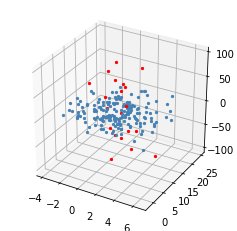

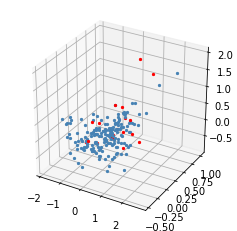

In [13]:
### Section 2.1.2
### Plot in 3D using the first three dimensions - Fig.3(A) 
# (TODO: not exactly the same as in the manuscript)
# (TODO: combine two subfigures into one row)

ori_coord=np.array(df_dim2)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# plot the original coordinates

for i in range(N):
    e=ori_coord[i]
    if (i in outlier_indices):
        ax.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show()

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# plot the corrected coordinates

for i in range(N):
    e=corr_coord[i]
    if (i in outlier_indices):
        ax.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show() # TODO: check with Khanh： this plot doesn't look correct, the original normal points are shifted too.



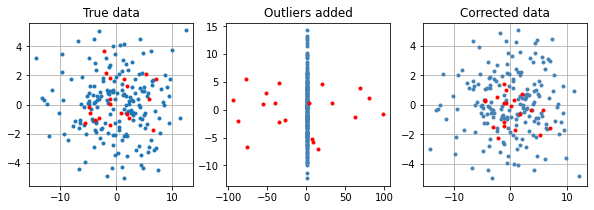

In [14]:
### Section 2.1.2
### Plot in 2D using the two largest eigenvalues - Fig.3(B) 

normal_indices=[i for i in range(N) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.3: Main subspace of higher dimensions

In [23]:
### Prepare for section 2.1.3

### test data, read in a dataset of main dimension 10
df_dim10 = pd.read_csv(r'outputs/bdd_synthetic_rdim10.csv',sep=';',header=None)
df_dim10.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7.162099,11.367509,1.913561,-3.062587,14.179932,6.004585,6.872586,15.620297,7.882274,-3.118684,1.995130,1.981384,1.993340,1.975892,2.002110,2.009032,1.979660,1.999756,2.028817,2.005676
1,-4.892780,15.263994,-2.247889,-4.437719,0.618265,8.514522,1.599986,2.374880,6.339398,-0.371037,2.018853,2.005253,2.025788,1.994554,2.004590,1.957766,2.010268,2.007472,1.979422,1.978146
2,1.345939,11.496061,0.626138,-1.827197,-0.745300,-3.280810,-0.782553,5.449258,10.767598,-1.214690,2.014695,1.993359,1.983327,2.003101,1.994623,2.015983,2.030312,1.989301,1.999659,1.997430
3,4.563623,8.248128,4.293483,3.982819,8.753456,1.311852,-8.373638,-3.557191,-5.565447,-5.863341,1.996126,1.988737,1.996331,2.014417,1.990729,2.025269,1.973386,1.999217,2.011674,1.997858
4,2.178519,6.330542,1.854298,-4.344373,12.913749,6.741589,2.657431,14.698554,5.272352,-1.608338,2.007993,1.984698,1.999780,2.002275,1.983325,1.989578,1.983817,2.007266,1.984380,1.987612


In [32]:
ori_dis=pdist(df_dim10.copy())
ori_dis_sq=squareform(ori_dis)
N=df_dim10.shape[0]

In [33]:
### Add outliers

prop=0.05
num_outliers=int(np.ceil(prop*N))
# random draw of outliers 
outlier_indices=np.sort(alea.sample(range(N),num_outliers))
for n in outlier_indices:
    horsplan=alea.uniform(-50,50)
    
    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)
    i=alea.randint(10,15)
    df_dim10.loc[n,i] = horsplan
df_dim10.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,7.162099,11.367509,1.913561,-3.062587,14.179932,6.004585,6.872586,15.620297,7.882274,-3.118684,1.995130,1.981384,1.993340,1.975892,2.002110,2.009032,1.979660,1.999756,2.028817,2.005676
1,-4.892780,15.263994,-2.247889,-4.437719,0.618265,8.514522,1.599986,2.374880,6.339398,-0.371037,2.018853,2.005253,2.025788,1.994554,2.004590,1.957766,2.010268,2.007472,1.979422,1.978146
2,1.345939,11.496061,0.626138,-1.827197,-0.745300,-3.280810,-0.782553,5.449258,10.767598,-1.214690,2.014695,1.993359,1.983327,2.003101,1.994623,2.015983,2.030312,1.989301,1.999659,1.997430
3,4.563623,8.248128,4.293483,3.982819,8.753456,1.311852,-8.373638,-3.557191,-5.565447,-5.863341,1.996126,1.988737,1.996331,2.014417,1.990729,2.025269,1.973386,1.999217,2.011674,1.997858
4,2.178519,6.330542,1.854298,-4.344373,12.913749,6.741589,2.657431,14.698554,5.272352,-1.608338,2.007993,1.984698,1.999780,2.002275,1.983325,1.989578,1.983817,2.007266,1.984380,1.987612
5,9.585863,9.474234,4.556702,-7.491628,16.257239,-0.143219,-9.504479,8.774885,-4.920075,-3.101683,2.003745,1.985127,1.986939,2.003667,2.004816,2.016891,2.034366,1.989245,2.040921,2.002831
6,-1.274660,10.858112,2.324798,-3.169695,11.500776,2.451441,11.609251,7.519440,-0.183385,-8.225163,2.010437,1.987577,2.020990,2.046753,2.008008,1.982216,2.003609,2.003818,1.988225,2.010689
7,4.153780,14.417812,-0.930010,1.948097,10.505234,-7.812979,-5.636820,12.997354,7.241736,-5.693541,1.971296,1.995450,1.982184,1.984285,2.000210,1.993380,1.976450,1.995207,2.019789,2.022713
8,1.332747,10.432901,-0.286040,-11.031643,-8.219235,19.030859,-4.038144,7.677479,0.523271,-3.110306,2.019435,1.952793,2.034303,2.030598,1.998286,1.989055,1.991246,2.002651,2.008516,1.988834
9,13.934062,12.072962,1.311802,-0.879798,6.534035,12.507520,-6.138941,14.616346,-1.483540,1.439795,1.989440,2.042311,1.971987,2.045637,1.998586,1.989417,1.987728,1.999024,1.989914,2.011598


In [34]:
### Preparing pairwise distances for the dataset with outliers

""" euclidean distances """
out_dis=pdist(df_dim10)
out_dis_sq=squareform(out_dis)


In [35]:
### Run nSimplices method
d=20
T1=time.time()
outlier_indices,rdim,corr_dis_sq,corr_coord = nSimplices(out_dis_sq,d,n0=1,nf=13)
T2=time.time()
print("running time is:", T2-T1)

running time is: 29.647464990615845


In [36]:
print(rdim) # TODO: however dimension is 9 due to dimension correction

9


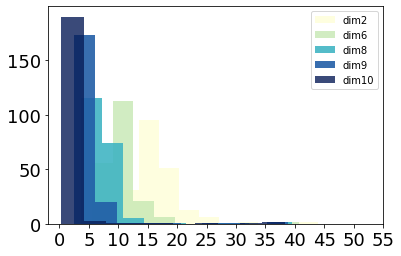

In [37]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 
# (TODO: not exactly the same as in the manuscript)
N=200
B=100

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    heights = nSimplwhichh(N,out_dis_sq,dim,seed=dim+1)
    hcolls.append(heights)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])

plt.xticks(np.arange(0, 60, 5))
plt.legend()
plt.show()


dim 2 ratio is: 1.1100280808586598 15.848477968613311 14.27754688543893
dim 3 ratio is: 1.110852374545829 14.27754688543893 12.852785133826888
dim 4 ratio is: 1.1031418015049328 12.852785133826888 11.651072524214754
dim 5 ratio is: 1.140855850483391 11.651072524214754 10.212572008355034
dim 6 ratio is: 1.19174296419715 10.212572008355034 8.56944183029854
dim 7 ratio is: 1.2534856867495119 8.56944183029854 6.836489575338087
dim 8 ratio is: 1.473453154693796 6.836489575338087 4.639773957902859
dim 9 ratio is: 6.195987992078784 4.639773957902859 0.7488352081757654
dim 10 ratio is: 3.91712252035063 0.7488352081757654 0.19116971815033643
dim 11 ratio is: 1.4891257207324682 0.19116971815033643 0.12837715143104522
dim 12 ratio is: 1.2880731911580294 0.12837715143104522 0.09966603785583722
dim 13 ratio is: 1.255269875907045 0.09966603785583722 0.07939809579499355
dim 14 ratio is: 1.2279165731942714 0.07939809579499355 0.06466082267173032


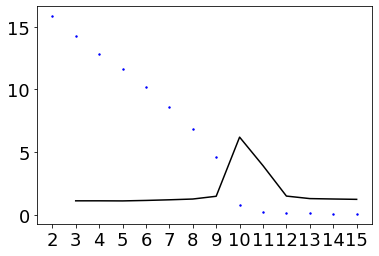

In [38]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference
# (TODO: check with Khanh, this plot does not do dimension correction)
# (TODO: not exactly the same as in the manuscript)

# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    print("dim", start_dim+i-1, "ratio is:", h_meds[i-1]/h_meds[i], h_meds[i-1], h_meds[i])
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

plt.figure()
plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
plt.xticks(np.arange(start_dim, end_dim+1, 1))
plt.show()


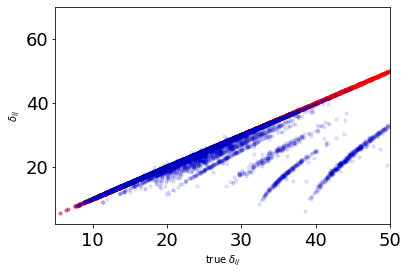

In [39]:
### Importance of dimension correction in higher dimension - Fig.4(C) Shepard Diagram
# (TODO: not exactly the same as in the manuscript)

out_dis_flat=out_dis_sq.flatten() # [200*200]
ori_dis_flat=ori_dis_sq.flatten()
corr_dis_flat=corr_dis_sq.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(ori_dis_flat,out_dis_flat,color='red',alpha=0.2,s=10)
plt.scatter(ori_dis_flat,corr_dis_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()


Section 2.1.4: Dimension correction in higher dimensions

In [41]:
# Read in dataset of main dimension 40
df_dim40 = pd.read_csv(r'datasets/bdd_synthetic_rdim40.csv',sep=';',header=None)
df_dim40.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.884310,9.628362,5.169816,0.593229,7.473802,1.040592,-3.361213,4.319038,2.255512,-6.438863,...,-5.167708,2.001932,1.956589,1.989807,2.008730,2.008140,1.978474,1.980495,2.031089,1.986115
1,3.390402,9.326640,-1.018645,0.480785,15.002497,12.726675,3.901818,-0.770232,-6.265948,-0.205683,...,-0.535279,2.009514,2.023822,1.976965,1.993956,2.019692,2.043539,1.993792,1.997134,1.998658
2,-5.827126,1.433676,2.763304,2.310429,12.083190,0.834956,-8.553036,8.645443,3.545084,-5.507355,...,-2.786968,2.005684,2.009829,1.973158,1.999259,2.005166,1.966800,2.006253,2.035410,1.971456
3,-0.347601,9.313045,-0.935694,2.791431,10.878105,-2.155244,7.303944,15.369113,3.434099,-9.985260,...,-2.225893,2.014265,1.973752,2.012823,2.003235,1.991552,2.005548,2.002062,1.971840,1.992611
4,0.697985,7.501421,5.325336,-3.974733,3.884708,11.123890,-2.984561,14.891479,3.229103,-1.856002,...,-1.092032,1.991126,1.978970,1.981129,2.006157,1.981203,2.038480,1.991013,2.000421,2.016908


In [46]:
props = np.arange(0, 0.14, 0.02)
dim_pred_diff = []
dim_raw_diff= []
true_dim = 40
for prop in props:
    df_outlier = sim_outliers(df_dim40, prop, 30, 50)
    out_dis=pdist(df_outlier) # pairwise distance in tab (with outliers added)
    out_dis_sq=squareform(out_dis) # squared matrix form of D
    _,rdim,_,_ = nSimplices(out_dis_sq,d,n0=30,nf=50)
    dim_pred_diff.append(rdim-true_dim)
    dim_raw_diff.append(rdim+int(round(rdim*prop))-true_dim)
    print("true_dim is:", true_dim)

ValueError: n_components=48 must be between 0 and min(n_samples, n_features)=20 with svd_solver='full'

In [ ]:
plt.figure()
plt.plot(props, dim_pred_diff, c="red")
plt.plot(props, dim_raw_diff, c="blue")
plt.xticks(props)
plt.show()